In [29]:
# Start with importing the packages
%matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE
from   sklearn.preprocessing import StandardScaler
import scipy
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-notebook'
pd.set_option('precision', 2)
pd.set_option('max_columns',10)

In [32]:
#sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [43]:
data_df = pd.read_csv('marker_expression.csv')
print(data_df.shape)
data_df.head()

(439, 29)


,ck5,ck7,ck17,ck18,ck19,...,chra,cd56,cd10,clin_diag,pad
0,0.00,92.5,20.00,92.5,92.5,...,0.0,0.00,0.00,Ductal pancreatic adenocarcinoma,Pancreas Ac|397
1,0.00,20.0,0.00,92.5,50.0,...,0.0,0.00,0.00,Hepatocellular carcinoma,Hepatocellular Cancer|190
2,0.00,92.5,0.00,92.5,92.5,...,2.5,0.00,0.00,Ductal pancreatic adenocarcinoma,Pancreas Ac|25
3,0.71,70.0,18.33,92.5,85.0,...,0.0,10.00,9.17,Gallbladder cancer,Gallbladder Ac|108
4,0.00,0.0,0.00,92.5,40.0,...,0.0,11.56,0.00,Hepatocellular carcinoma,Hepatocellular Cancer|336


In [44]:
#group by clincial diagnosis
grouped_df = data_df.set_index('clin_diag')
del grouped_df['pad']
grouped_df

,ck5,ck7,ck17,ck18,ck19,...,ki67,smad4,chra,cd56,cd10
clin_diag,,,,,,,,,,,
Ductal pancreatic adenocarcinoma,0.00,92.5,20.00,92.5,92.5,...,20.0,0.00,0.0,0.00,0.00
Hepatocellular carcinoma,0.00,20.0,0.00,92.5,50.0,...,30.0,90.00,0.0,0.00,0.00
Ductal pancreatic adenocarcinoma,0.00,92.5,0.00,92.5,92.5,...,40.0,70.00,2.5,0.00,0.00
Gallbladder cancer,0.71,70.0,18.33,92.5,85.0,...,30.0,42.50,0.0,10.00,9.17
Hepatocellular carcinoma,0.00,0.0,0.00,92.5,40.0,...,10.0,58.78,0.0,11.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...
Distal bile duct cancer,0.00,80.0,60.00,85.0,92.5,...,40.0,90.00,5.0,0.00,5.00
Perihilar cholangiocarcinoma,0.00,60.0,30.00,92.5,92.5,...,30.0,95.00,0.0,0.00,0.00
Ductal pancreatic adenocarcinoma,50.00,92.5,92.50,92.5,92.5,...,80.0,85.00,0.0,0.00,0.00


In [33]:
#fit = umap.UMAP()
#%time u = fit.fit_transform(grouped_df)

CPU times: user 7.1 s, sys: 199 ms, total: 7.3 s
Wall time: 5.57 s


In [36]:
#plt.scatter(u[:,0], u[:,1], c=grouped_df)
#plt.title('UMAP embedding of random colours');

<IPython.core.display.Javascript object>

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not                                     ck5   ck7   ck17  ck18  ck19  ...  ki67  \
clin_diag                                                         ...         
Ductal pancreatic adenocarcinoma   0.00  92.5  20.00  92.5  92.5  ...  20.0   
Hepatocellular carcinoma           0.00  20.0   0.00  92.5  50.0  ...  30.0   
Ductal pancreatic adenocarcinoma   0.00  92.5   0.00  92.5  92.5  ...  40.0   
Gallbladder cancer                 0.71  70.0  18.33  92.5  85.0  ...  30.0   
Hepatocellular carcinoma           0.00   0.0   0.00  92.5  40.0  ...  10.0   
...                                 ...   ...    ...   ...   ...  ...   ...   
Distal bile duct cancer            0.00  80.0  60.00  85.0  92.5  ...  40.0   
Perihilar cholangiocarcinoma       0.00  60.0  30.00  92.5  92.5  ...  30.0   
Ductal pancreatic adenocarcinoma  50.00  92.5  92.50  92.5  92.5  ...  80.0   
Intrahepatic cholangiocarcinoma    0.00  92.5   0.00  92.5  92.5  ...  40.0   
Hepatocellular carcinoma           0.00  92.5  24.38  92.5   0.0  ...  10.0   

                                  smad4  chra   cd56  cd10  
clin_diag                                                   
Ductal pancreatic adenocarcinoma   0.00   0.0   0.00  0.00  
Hepatocellular carcinoma          90.00   0.0   0.00  0.00  
Ductal pancreatic adenocarcinoma  70.00   2.5   0.00  0.00  
Gallbladder cancer                42.50   0.0  10.00  9.17  
Hepatocellular carcinoma          58.78   0.0  11.56  0.00  
...                                 ...   ...    ...   ...  
Distal bile duct cancer           90.00   5.0   0.00  5.00  
Perihilar cholangiocarcinoma      95.00   0.0   0.00  0.00  
Ductal pancreatic adenocarcinoma  85.00   0.0   0.00  0.00  
Intrahepatic cholangiocarcinoma   95.00   0.0   0.00  0.00  
Hepatocellular carcinoma          53.57   0.0   0.00  0.00  

[439 rows x 27 columns].

<IPython.core.display.Javascript object>


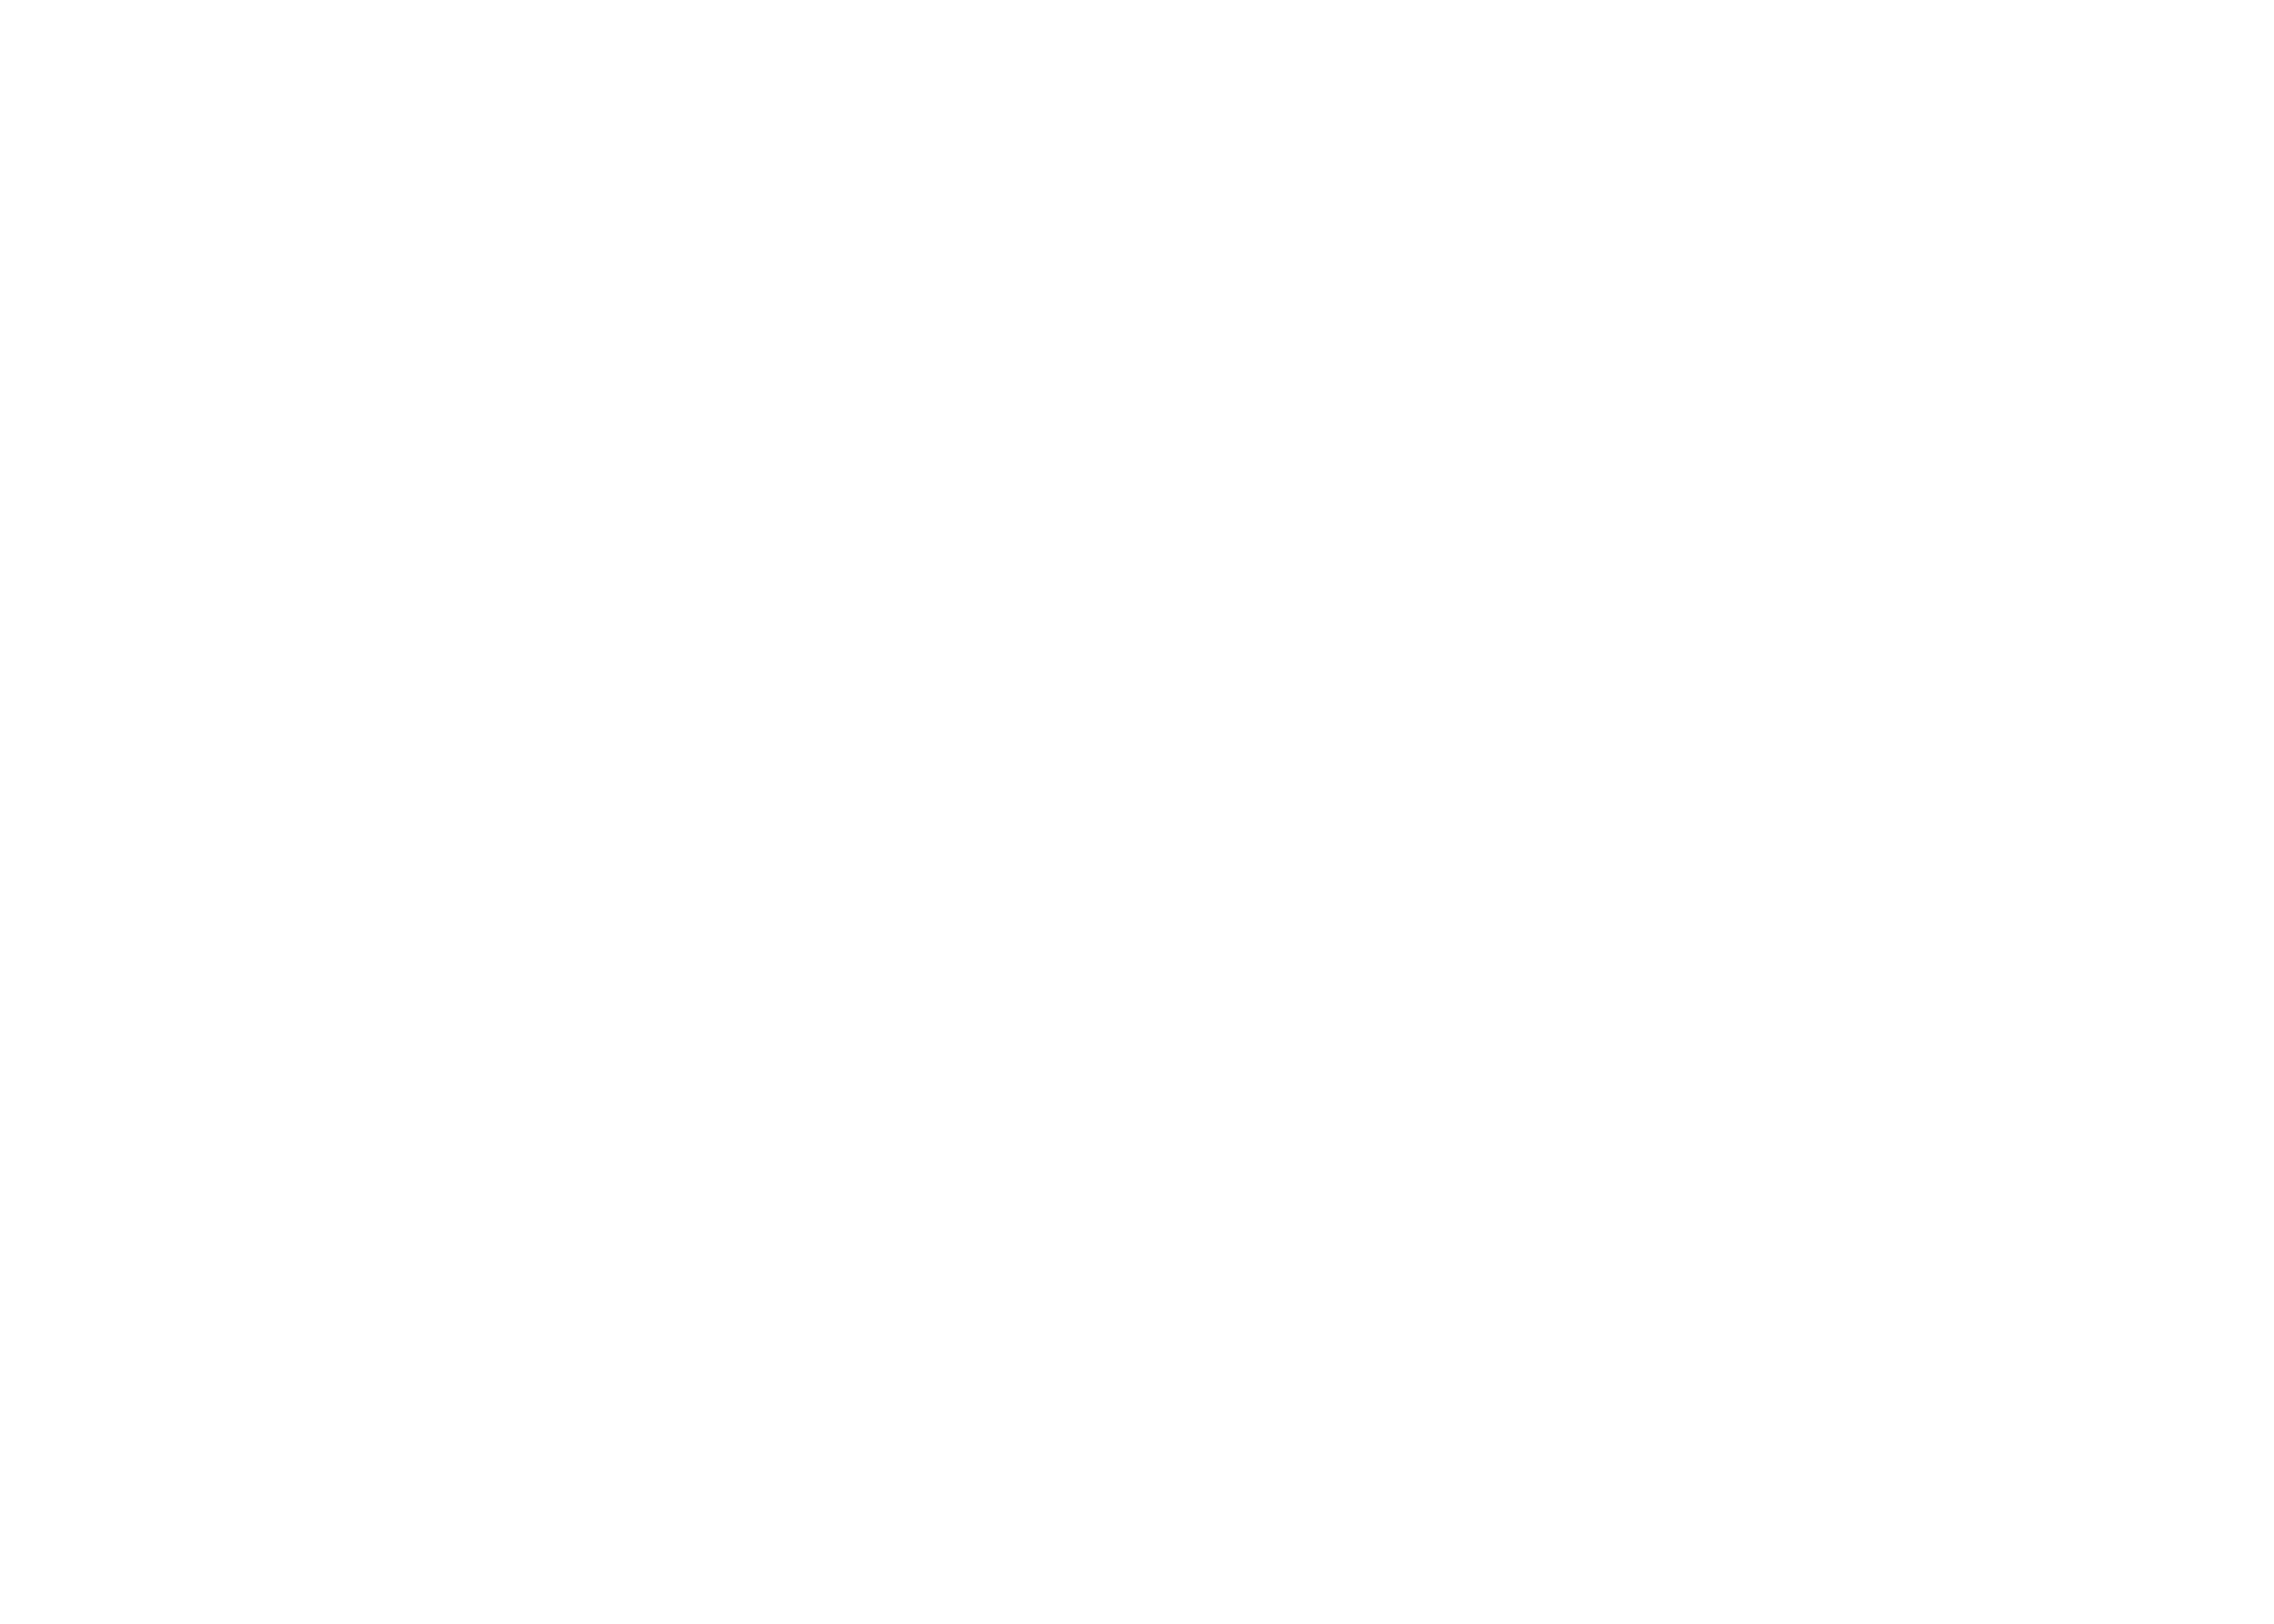

In [46]:
X_tsne = TSNE(n_components=2, random_state=0, perplexity = 50).fit_transform(grouped_df.loc[:,'ck5':'cd10'])
fig = plt.figure()

<IPython.core.display.Javascript object>


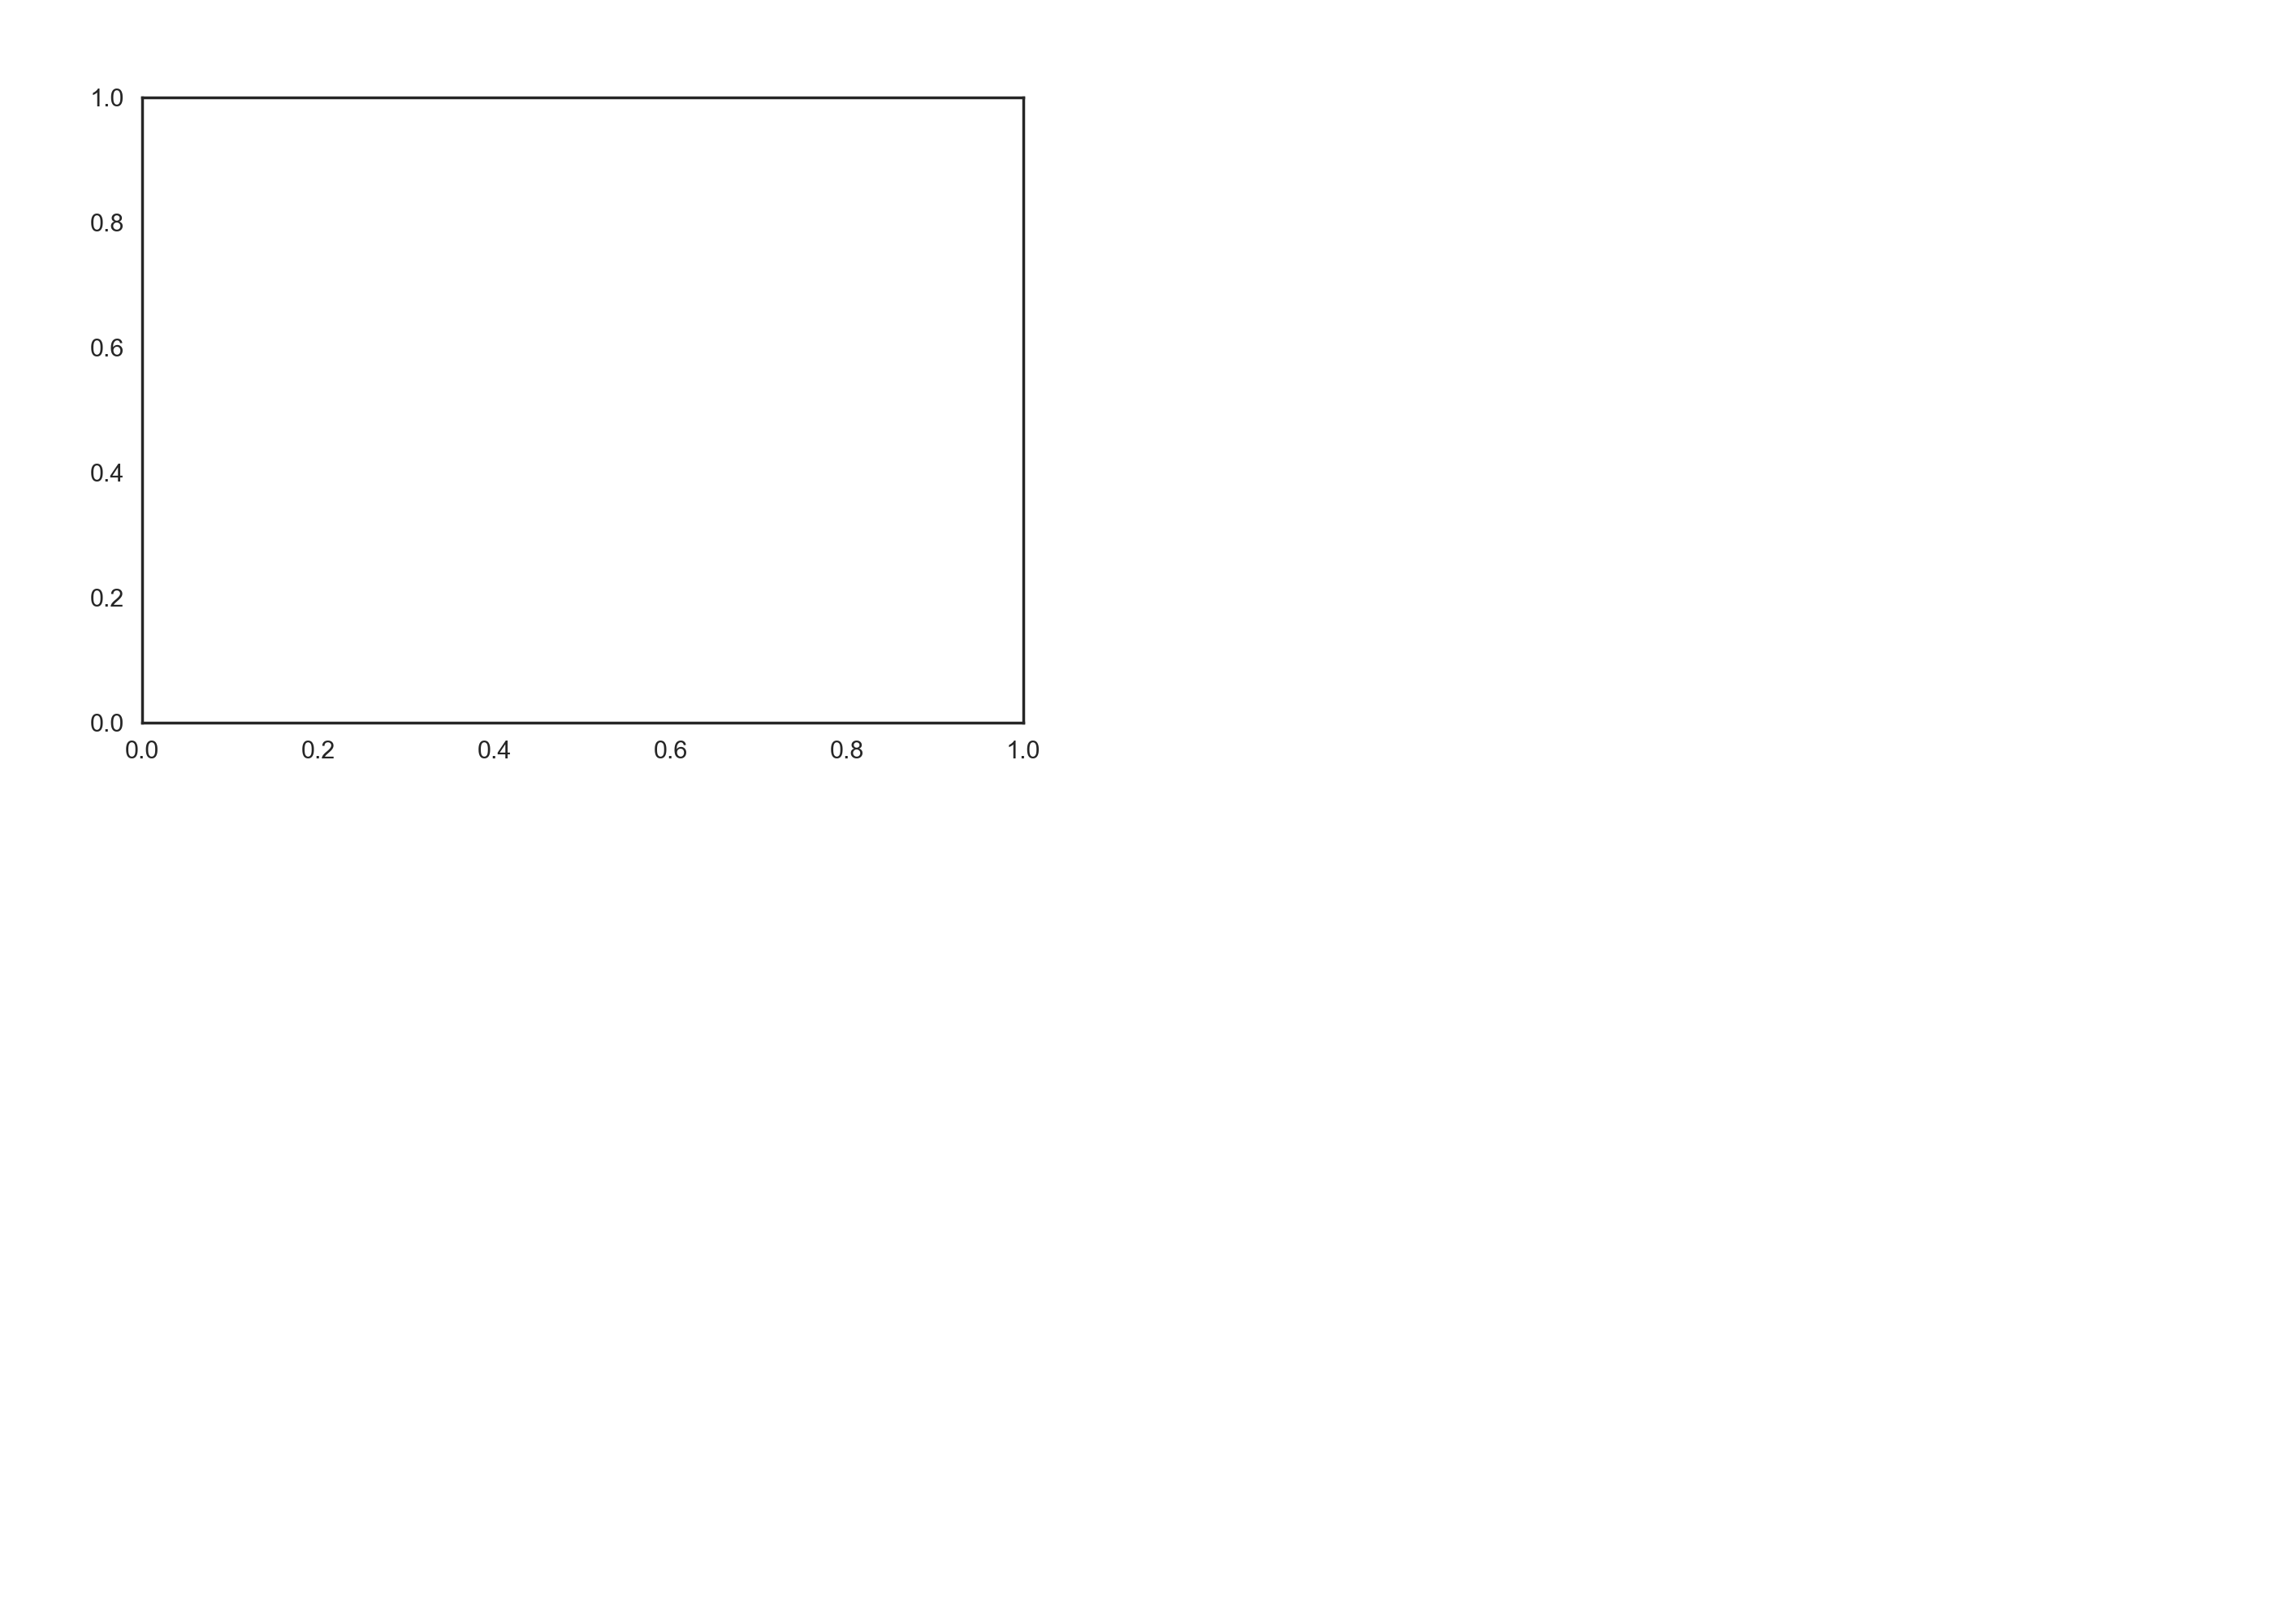

NameError: name 'groped_df' is not defined

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_tsne[groped_df['label'] == 'normal', 0], X_tsne[grouped_df['label'] == 'normal', 1], alpha=0.2,c='b')
ax.scatter(X_tsne[grouped_df['label'] == 'cancer', 0], X_tsne[grouped_df['label'] == 'cancer', 1], alpha=0.2,c='r')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
plt.show()